This class has been helpful in giving me an opportunity to learn Python, specifically the <i>jupyter</i> platform. I've been able to apply these skills to hobby projects, such as this single body gravity simulator. It operates by performing vector calculations to determine an acceleration vector, and through vector addition, altering the velocity and position vectors. This is looped an arbitrary number of times.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

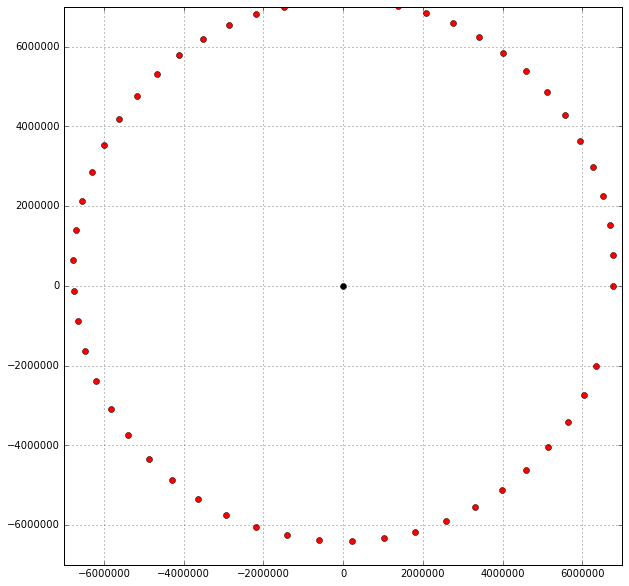

In [10]:
position     = np.matrix([[6771000.],[0.]]) #position vector
velocity     = np.matrix([[0.],[7660]])#velocity vector
acceleration = np.matrix([[0.],[0.]])   #acceleration vector
plt.figure(figsize=(10,10))
plt.plot(0,0,'ko') #plots origin
plt.grid(True)
for i in range(0,54): #on a loop, perform vector addition, plot new result
    fig=plt.plot(position[0],position[1],'ro') #plot position as red dot
    position+=velocity*100 #step position forward; delta-t = 1
    acceleration[0] = -398590000000000*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[0]#calculate acceleration in x
    acceleration[1] = -398590000000000*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[1]#calculate acceleration in y
    velocity+=acceleration*100 #step velocity forward delta-t = 1
plt.xlim(-7000000,7000000)
plt.ylim(-7000000,7000000)
plt.savefig('figure.png')
plt.show()

#ideas for improvement:
#change order of calculations in for loop, to possibly increase accuracy
#optimize operations, to increase speed
#implement dynamic resolution

C:\Users\jacom\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


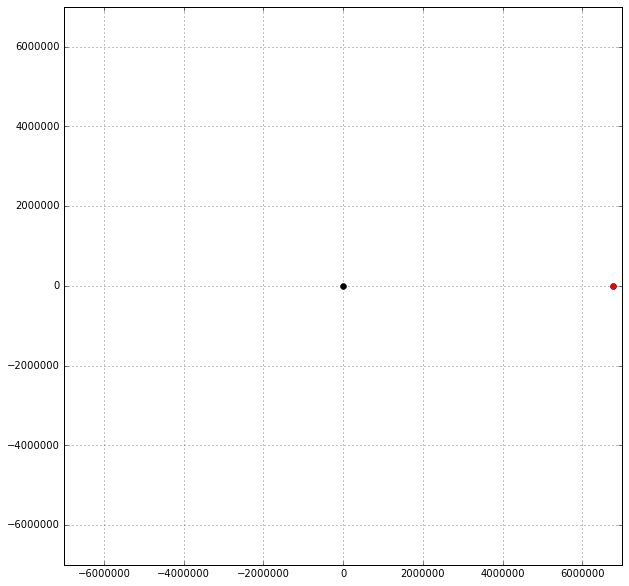

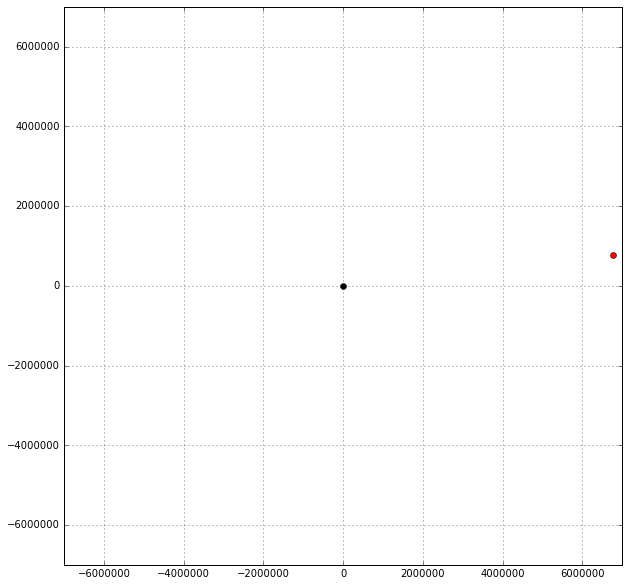

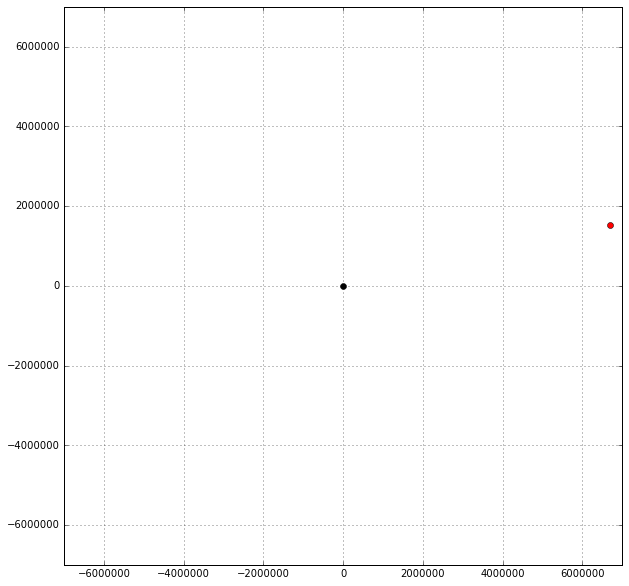

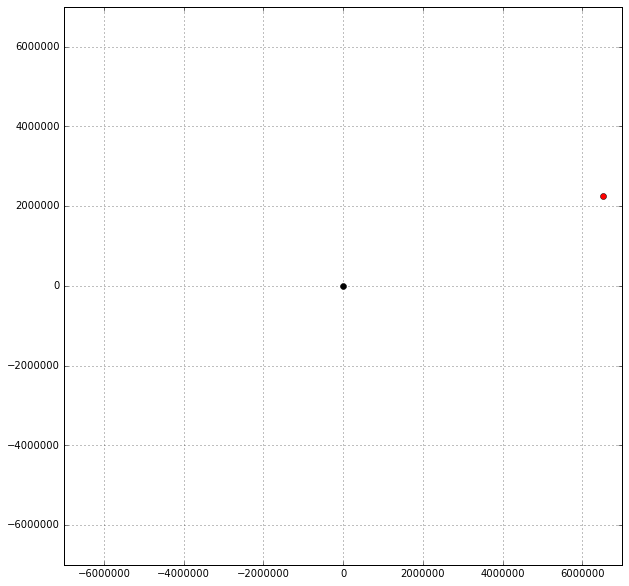

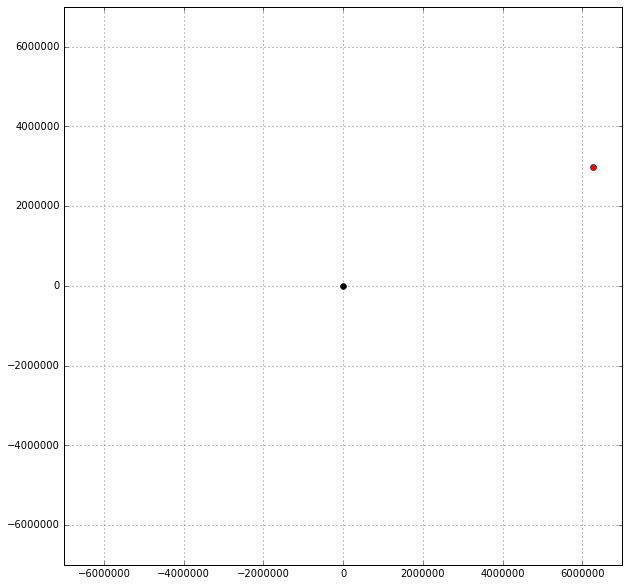

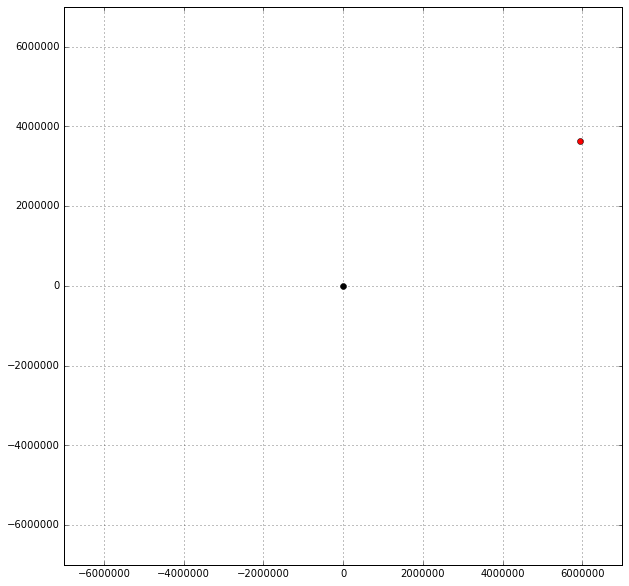

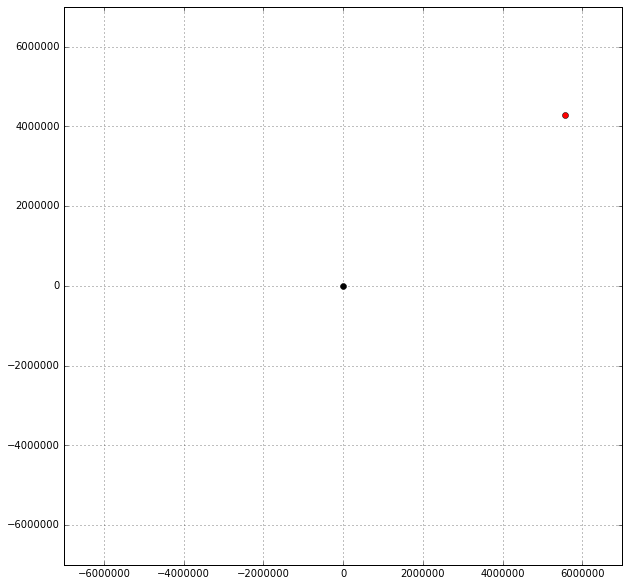

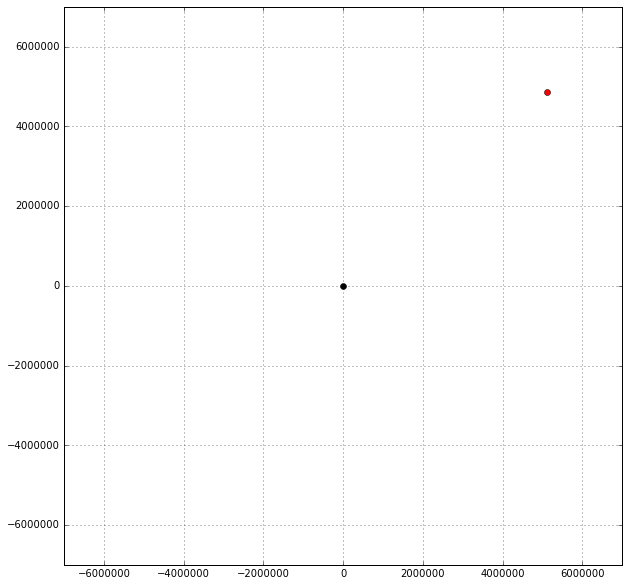

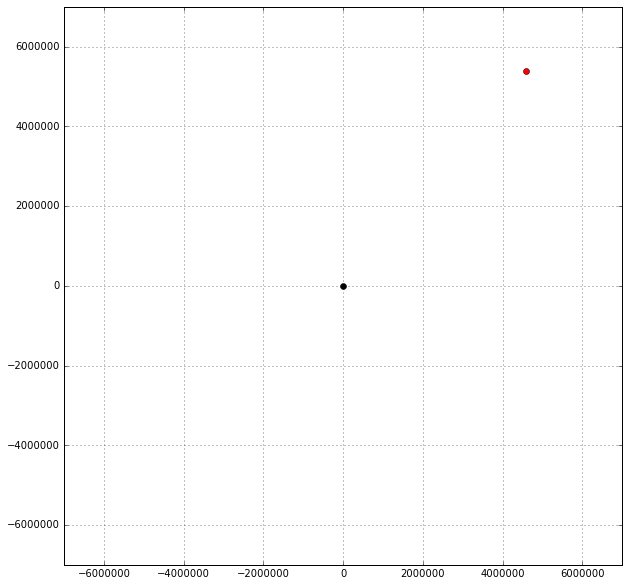

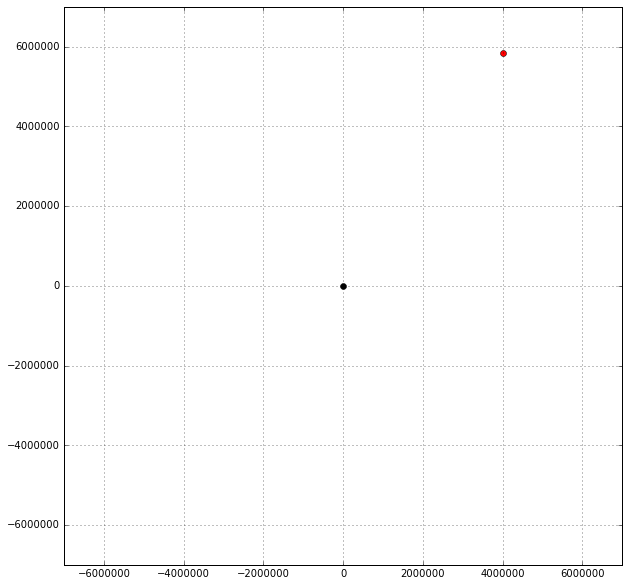

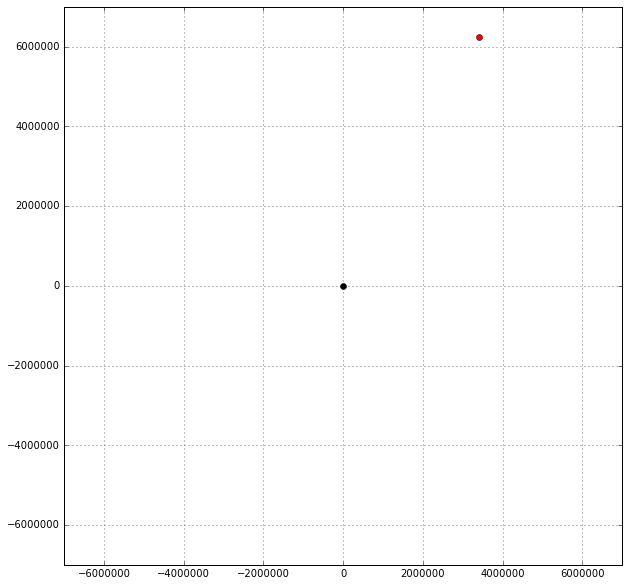

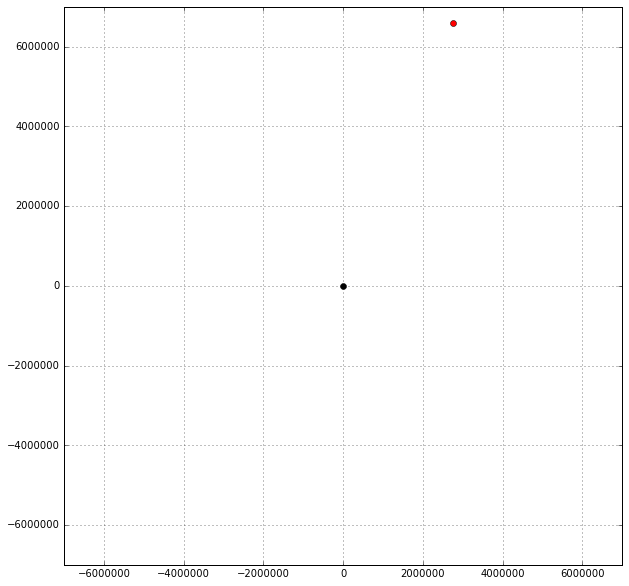

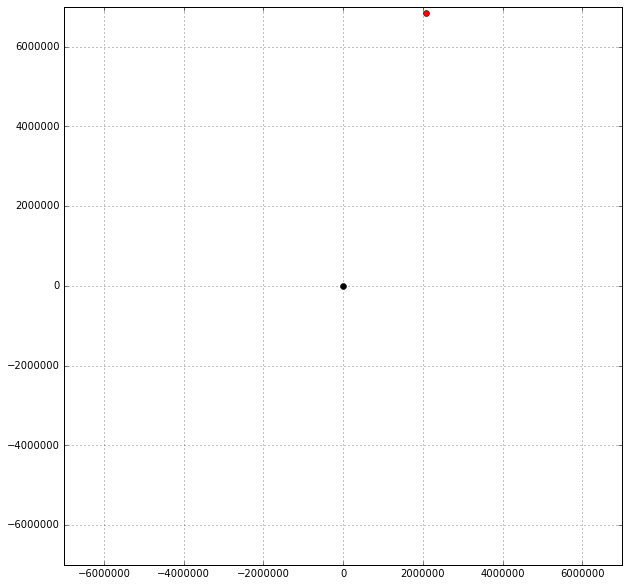

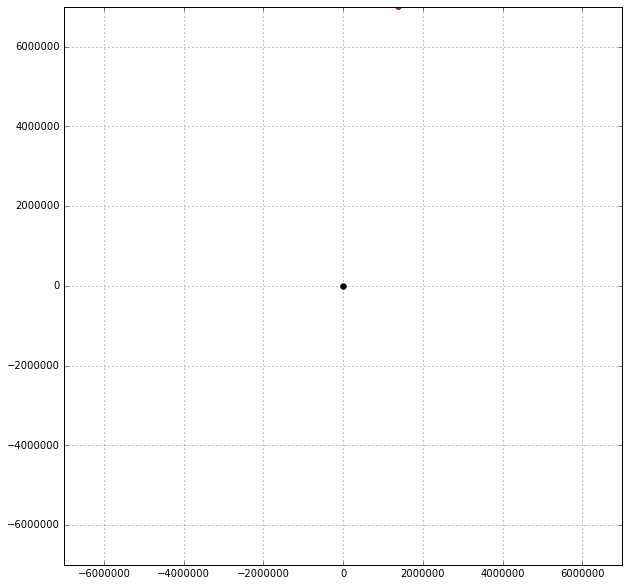

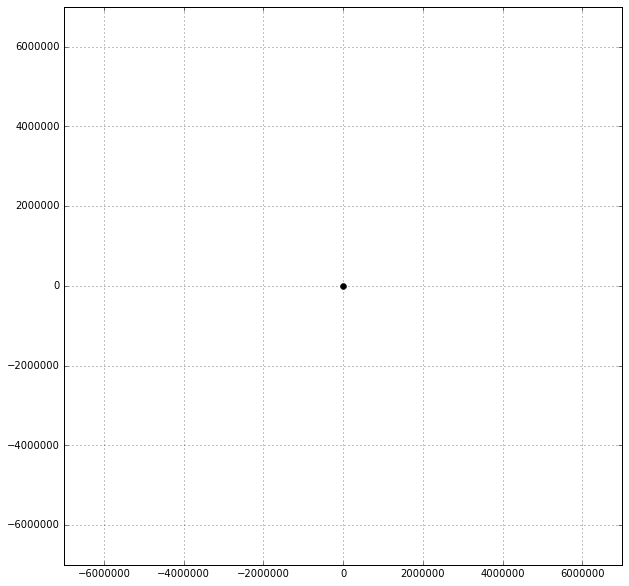

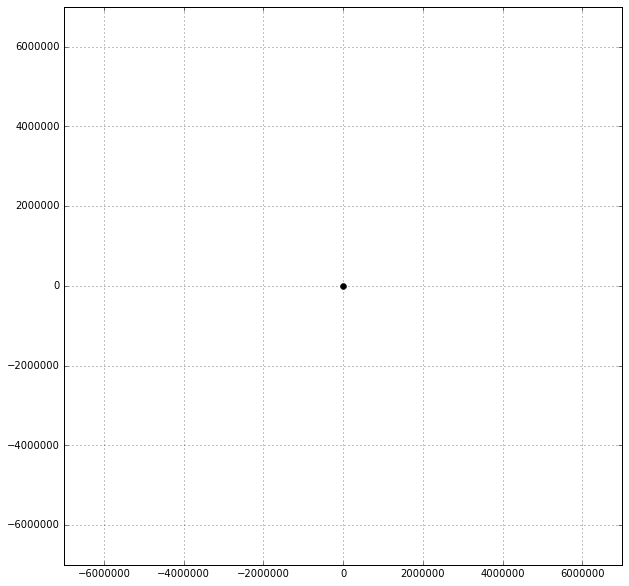

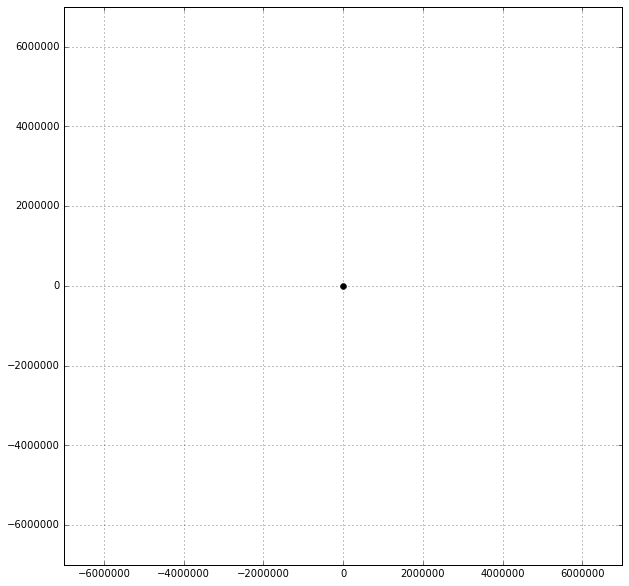

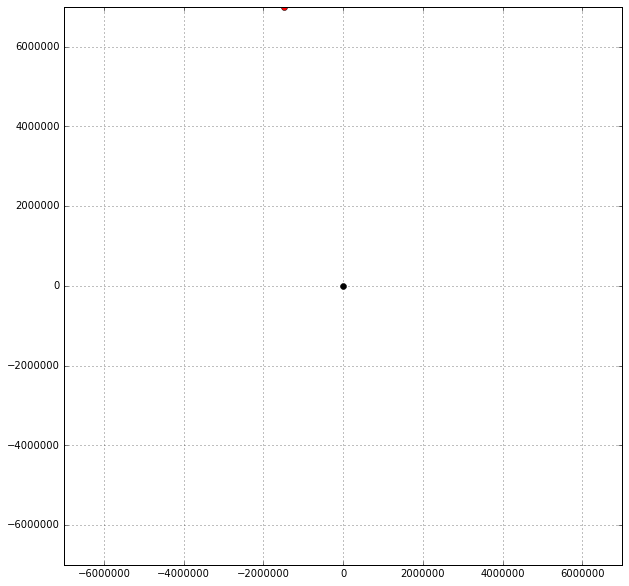

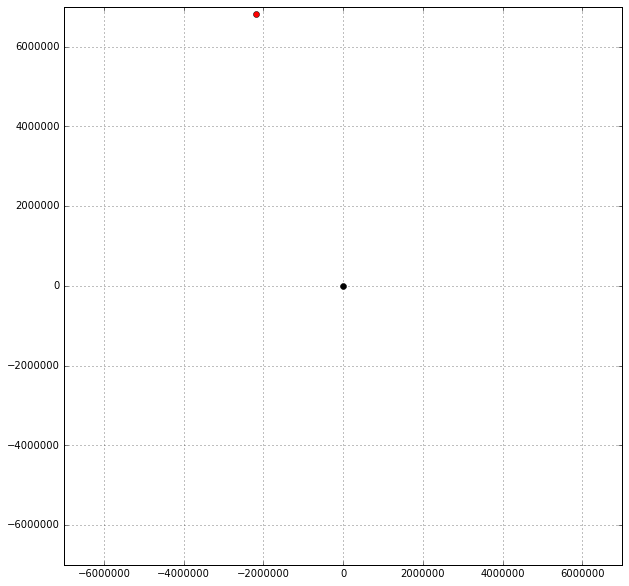

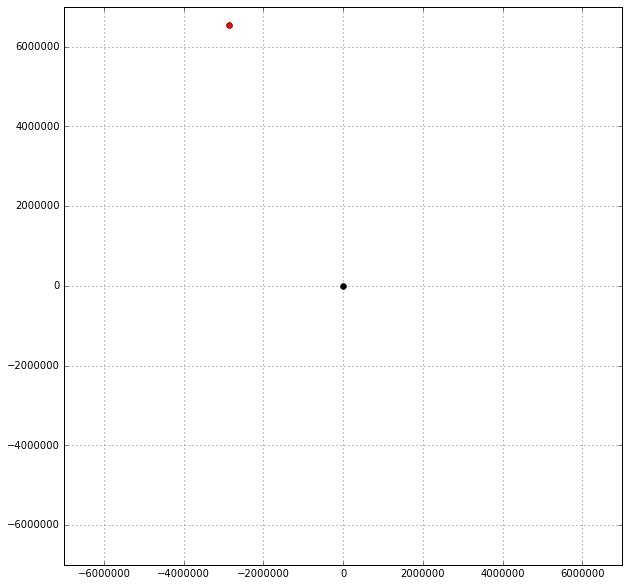

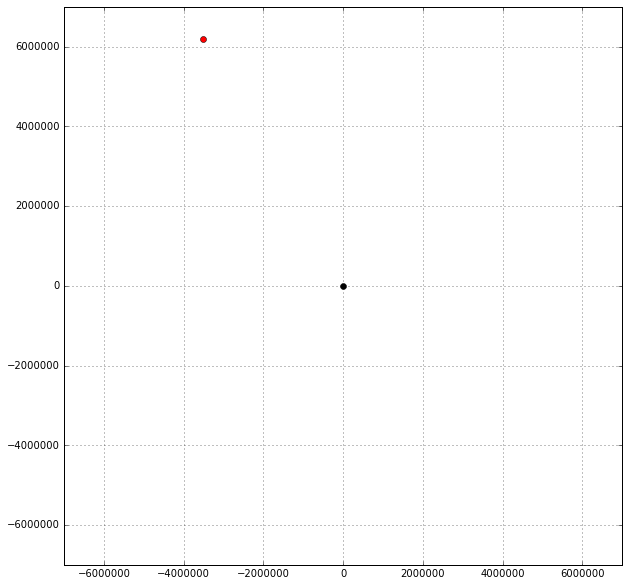

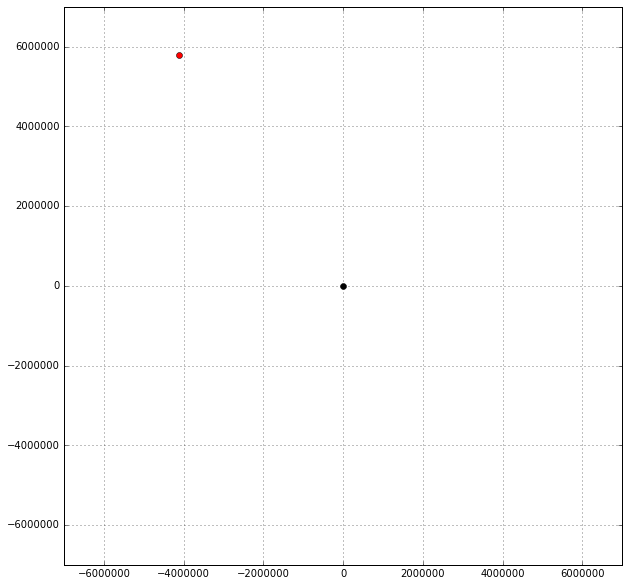

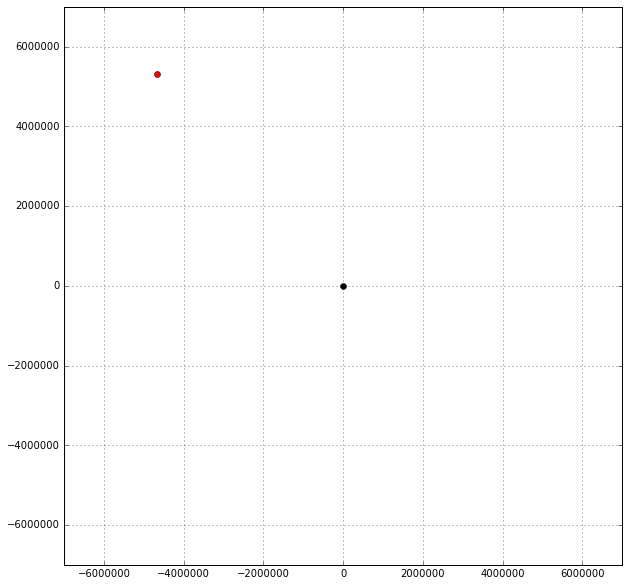

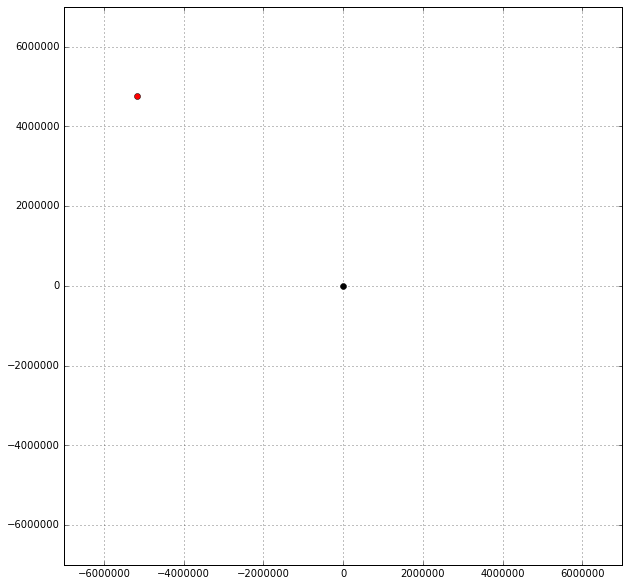

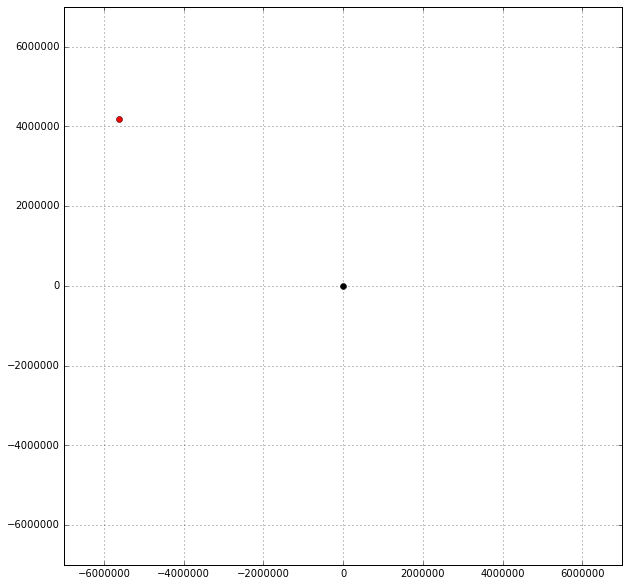

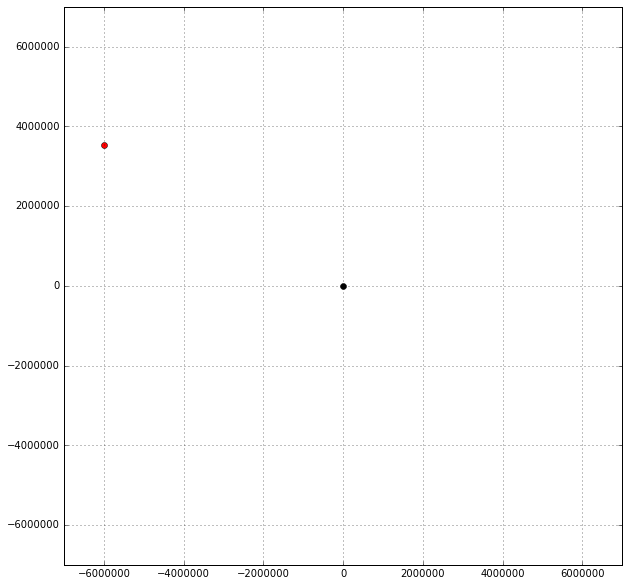

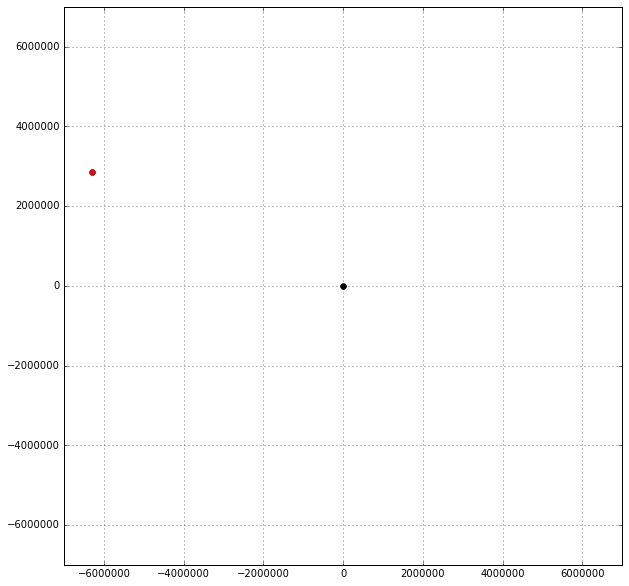

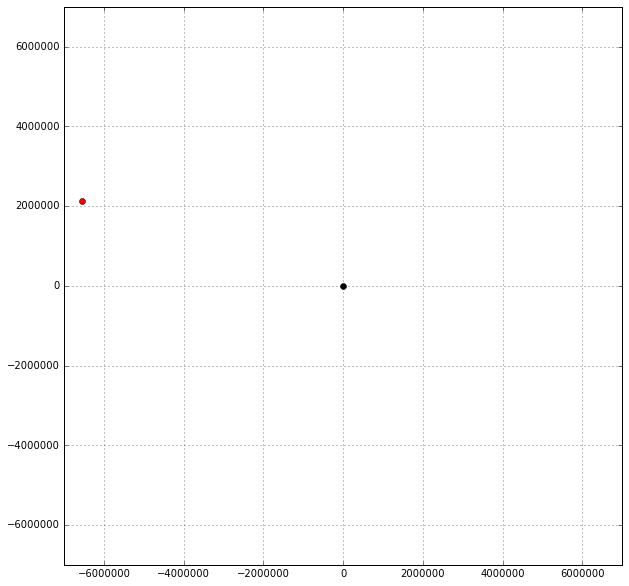

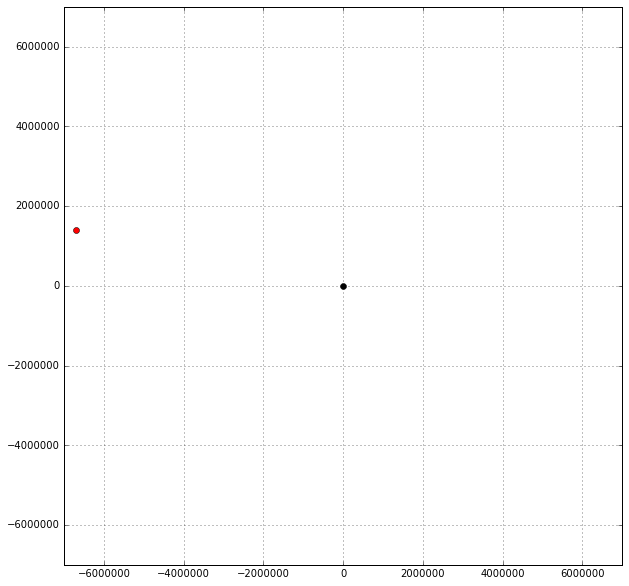

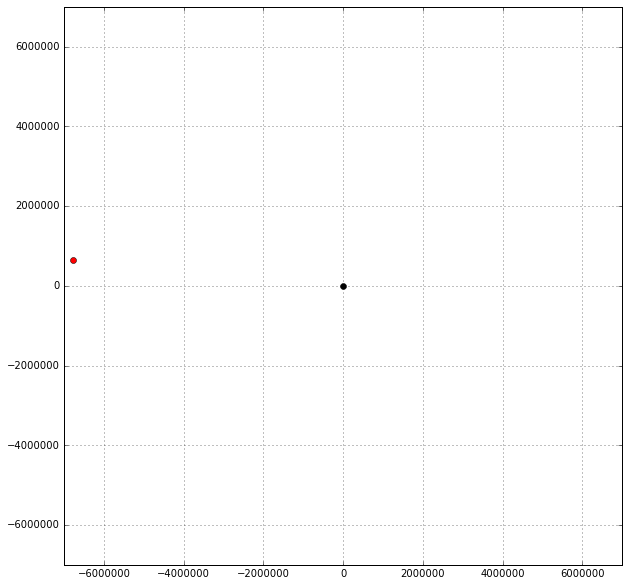

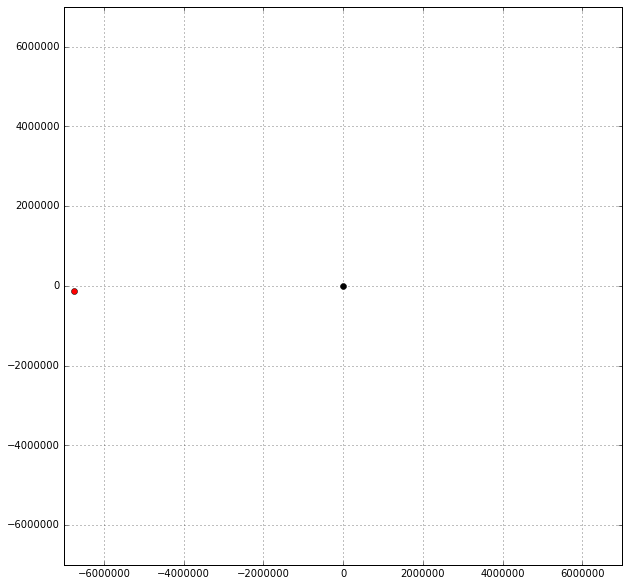

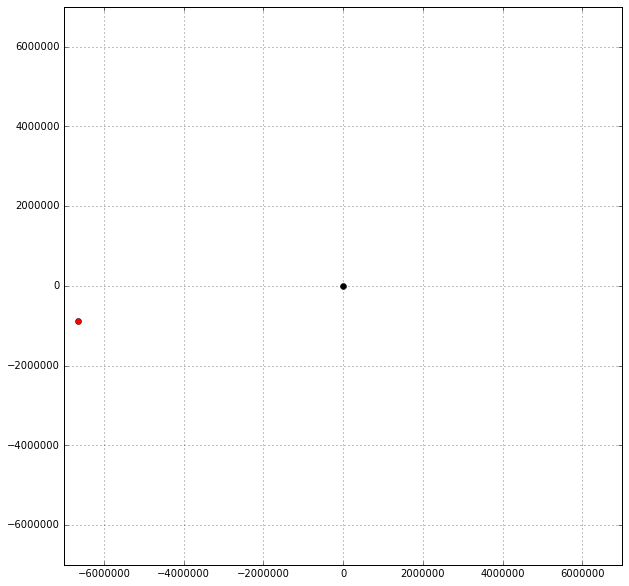

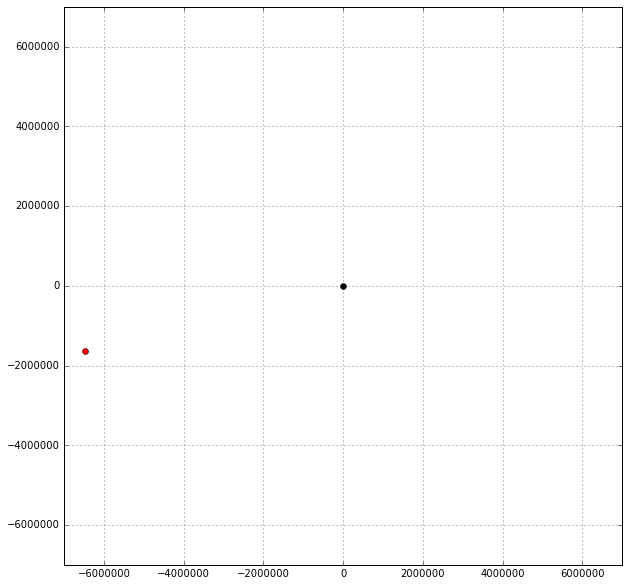

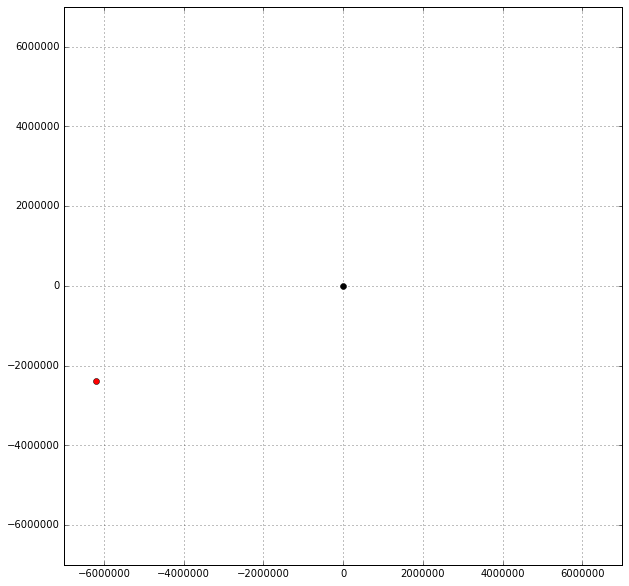

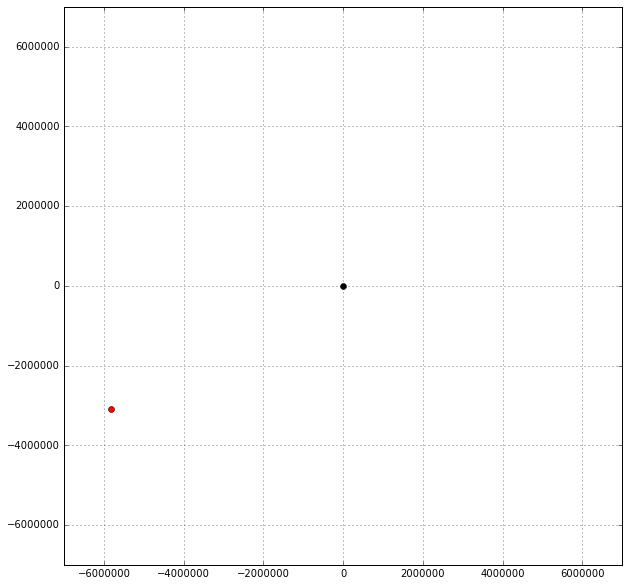

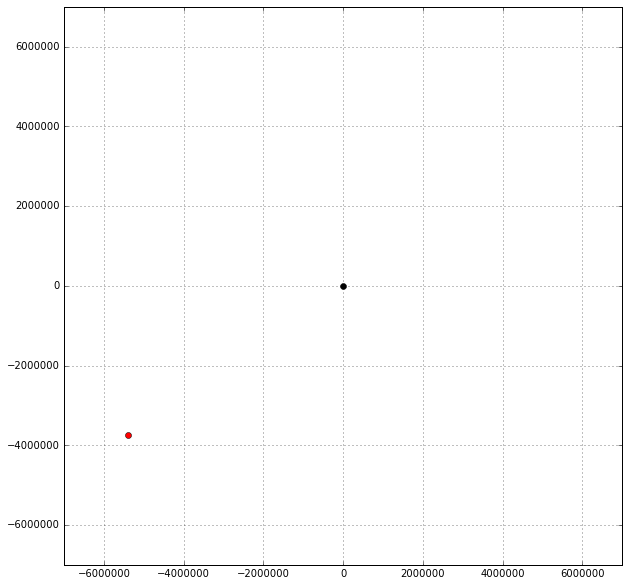

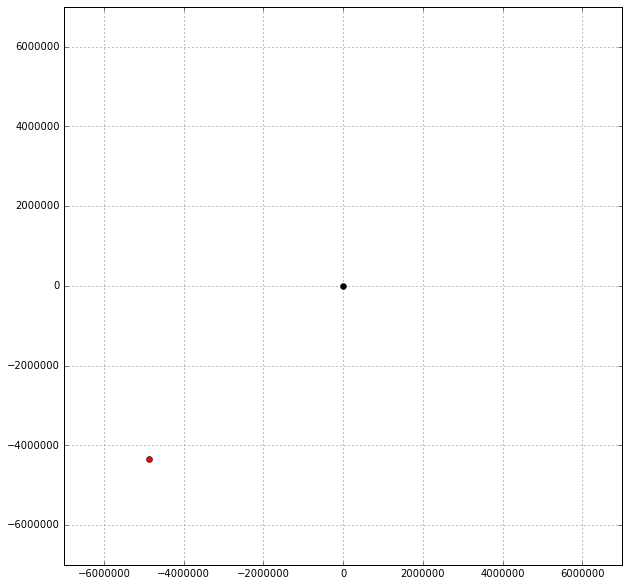

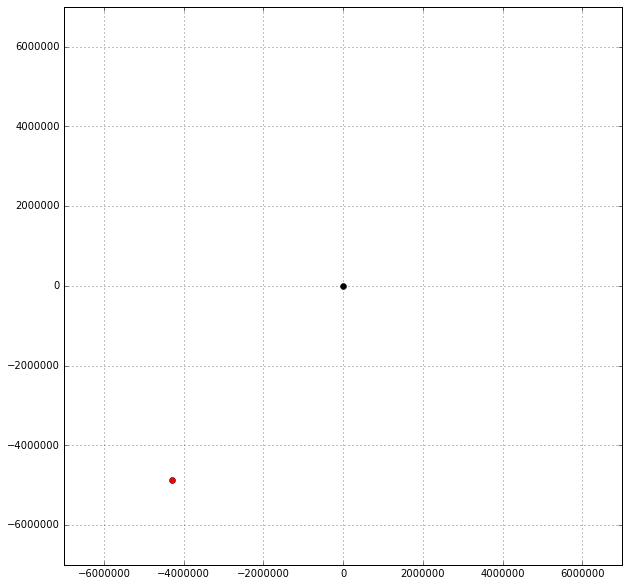

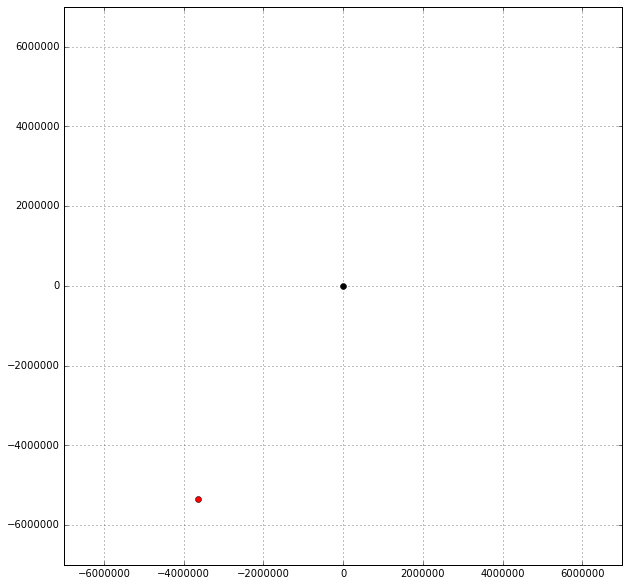

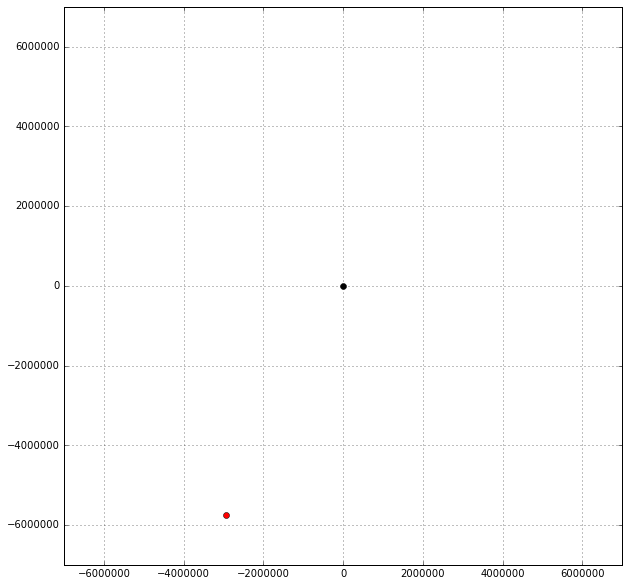

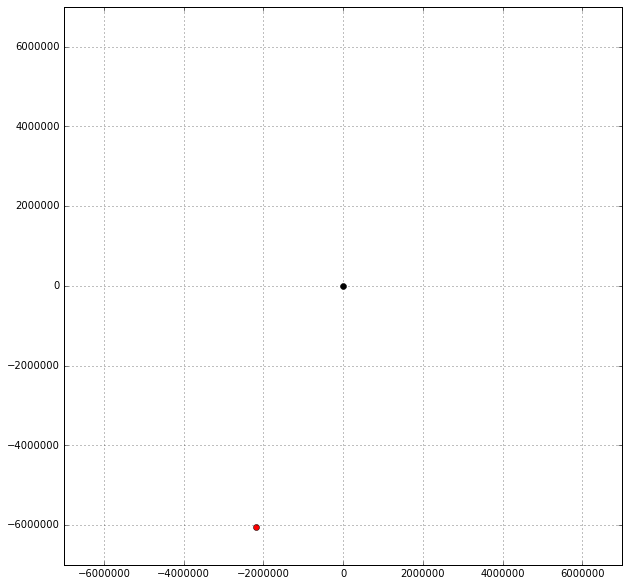

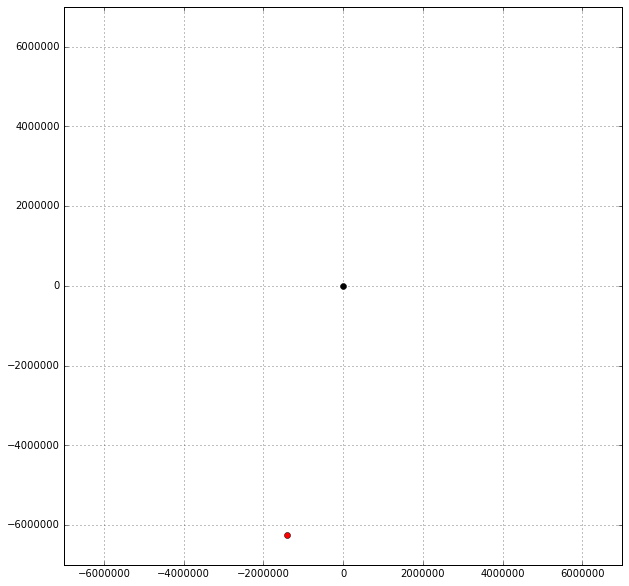

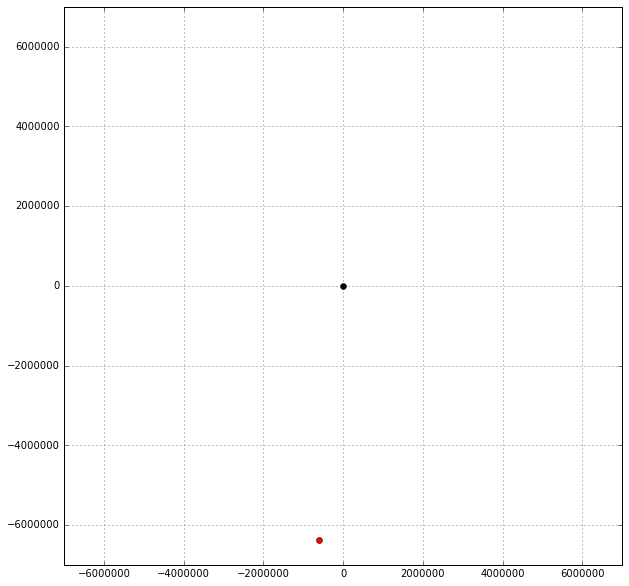

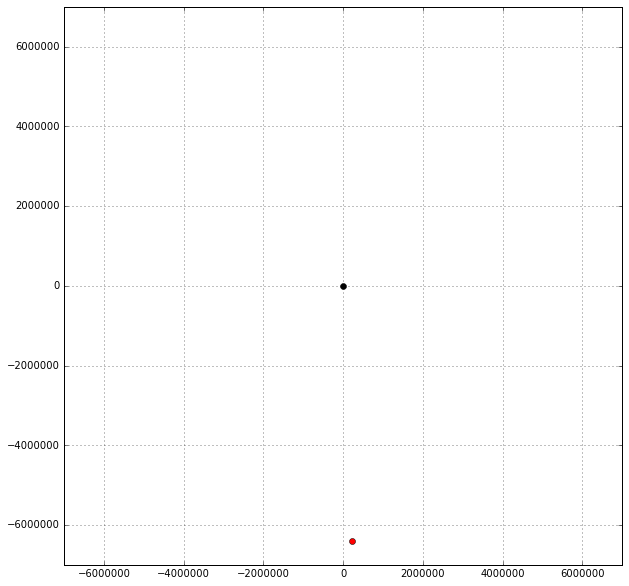

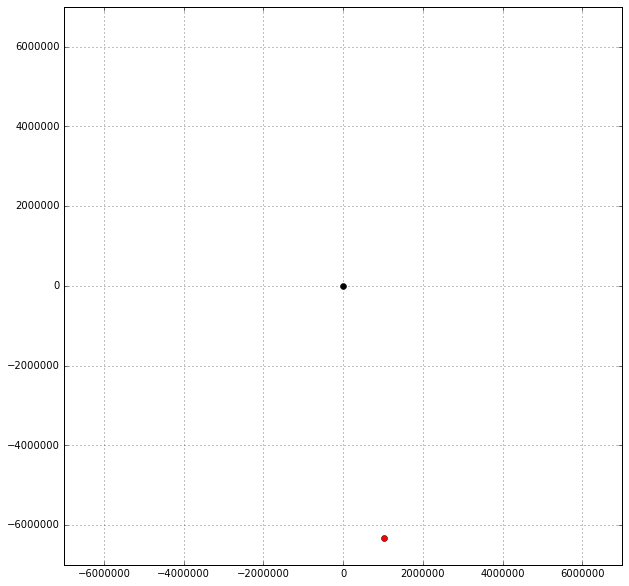

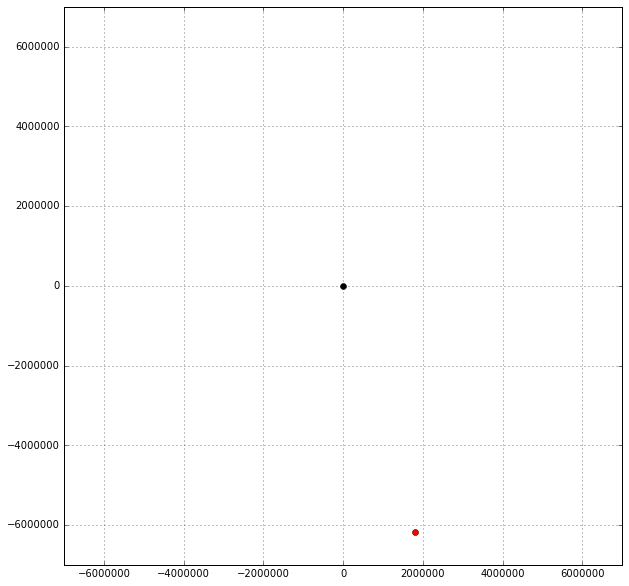

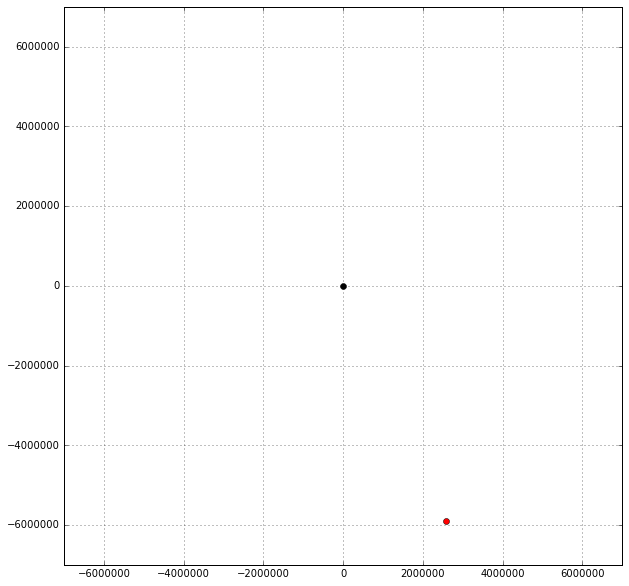

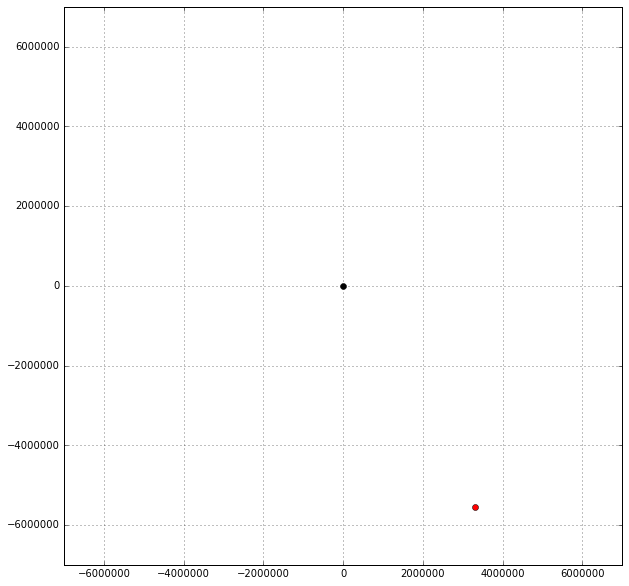

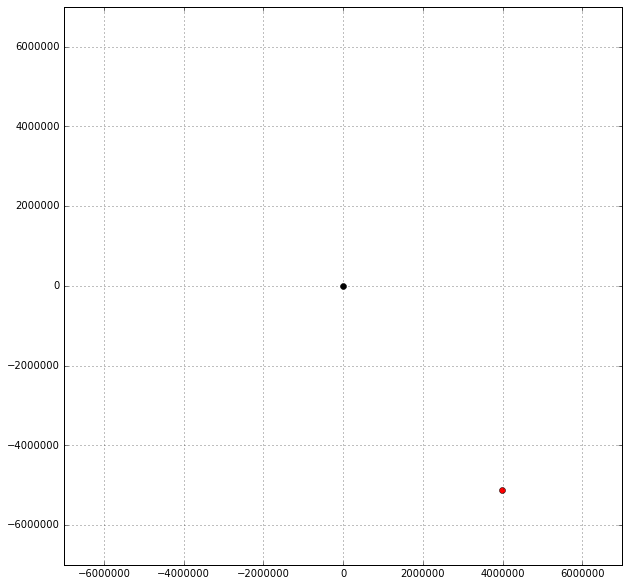

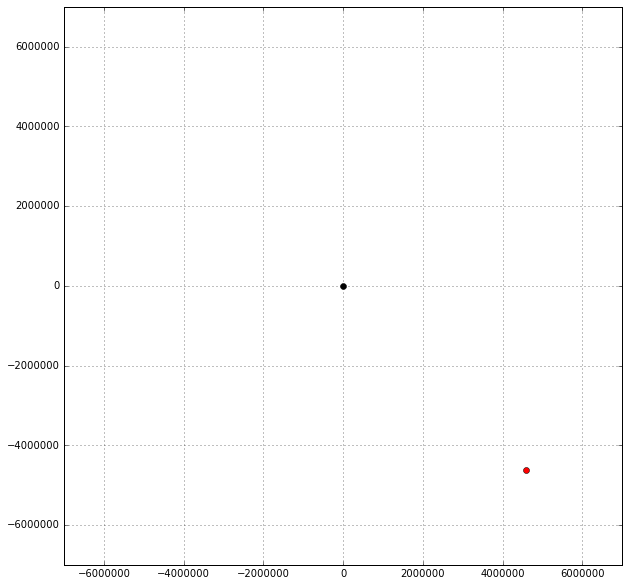

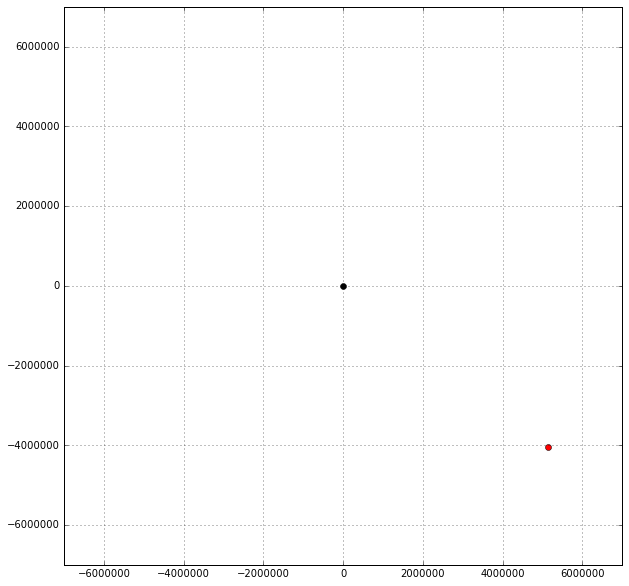

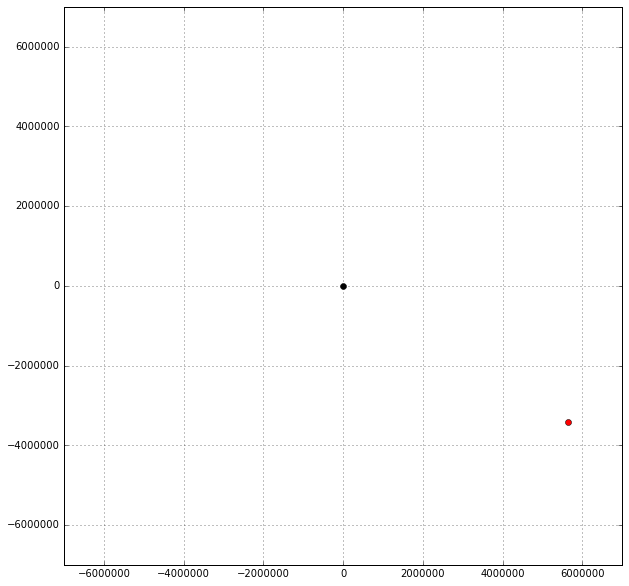

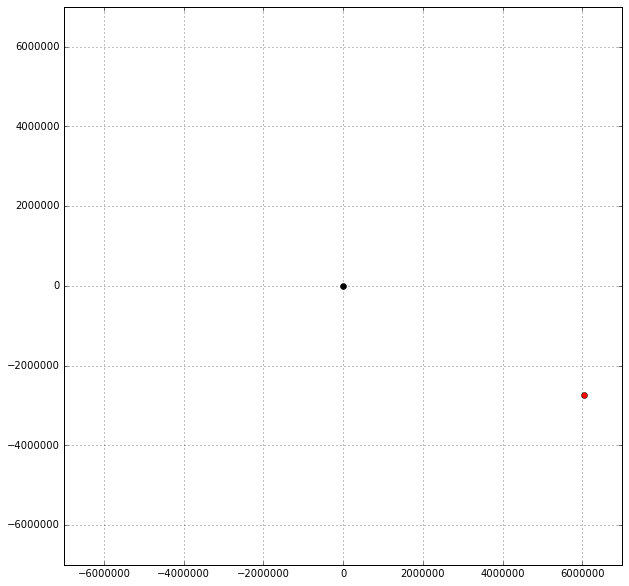

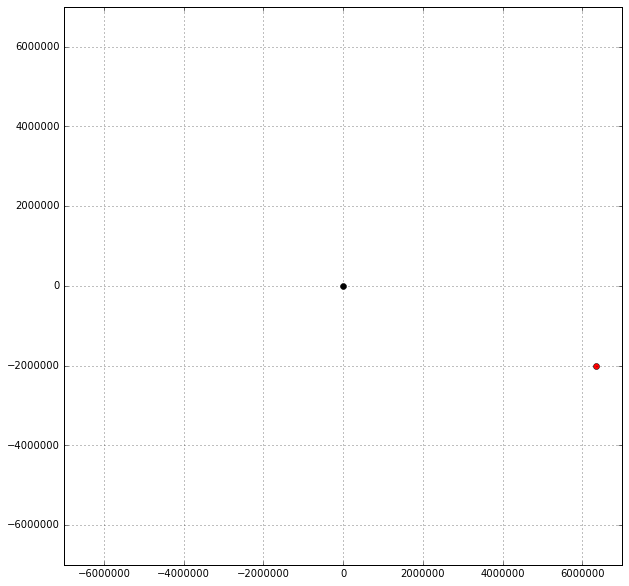

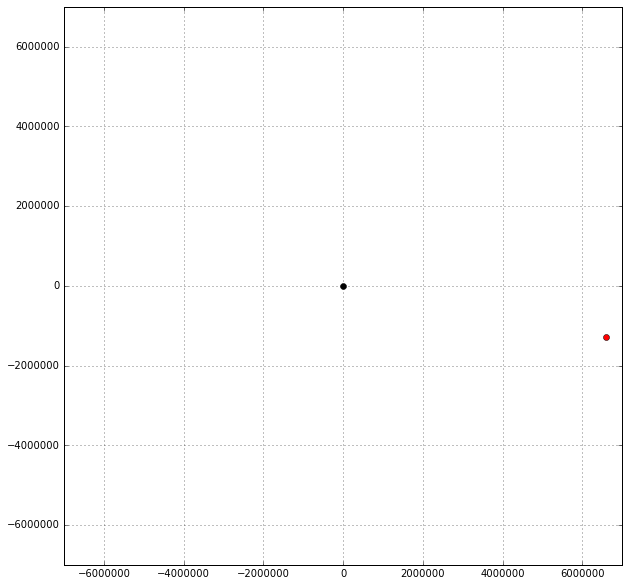

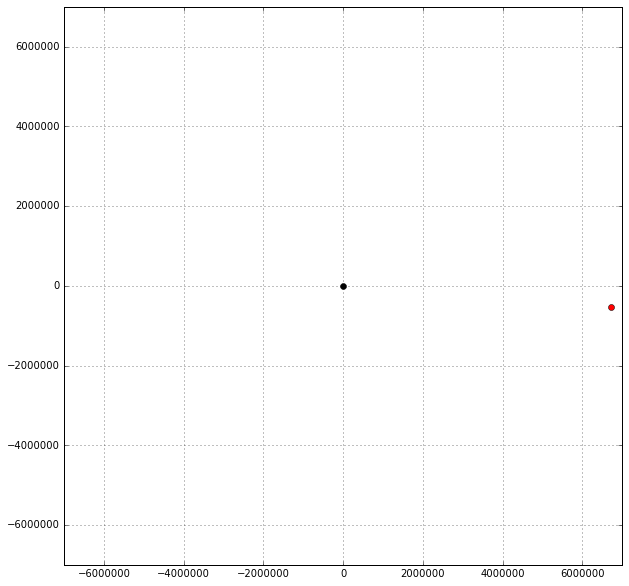

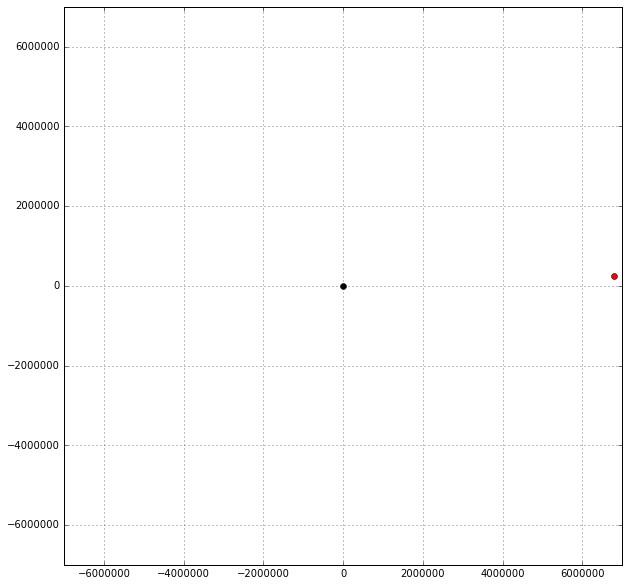

In [14]:
# this code does the same as above but outputs a different plot for every iteration of the loop
position     = np.matrix([[6771000.],[0.]]) #position vector
velocity     = np.matrix([[0.],[7660]])#velocity vector
acceleration = np.matrix([[0.],[0.]])   #acceleration vector

#need to figure out how to not show these plots

for i in range(0,57): #on a loop, perform vector addition, plot new result
    plt.figure(figsize=(10,10))
    plt.plot(0,0,'ko') #plots origin
    plt.grid(True)
    plt.plot(position[0],position[1],'ro') #plot position as red dot
    position+=velocity*100 #step position forward; delta-t = 1
    acceleration[0] = -398590000000000*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[0]#calculate acceleration in x
    acceleration[1] = -398590000000000*(1/np.power(((position[0]**2)+(position[1]**2)),1.5))*position[1]#calculate acceleration in y
    velocity+=acceleration*100 #step velocity forward delta-t = 1
    plt.xlim(-7000000,7000000)
    plt.ylim(-7000000,7000000)
    plt.savefig('figure' + str(i) + '.png')

While not directly related to error analysis, it would be possible to apply some of the techniques of this course in order to find the amount of error in the simulation, compared to a closed form conic section solution of the orbit.